In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

class Network:
    
    def __init__(self,lr,size=[3,3,1]):
        
        self.size = size
        self.lr = lr
        
        self.weights = [np.linspace(start=-1,stop=1,num=(row*col)).reshape((row,col)) for row,col in zip(size[:-1],size[1:])]
        self.biases = [np.linspace(start=-1,stop=1,num=col).reshape((-1,col)) for col in size[1:]]
    
    def activation(self,i):
        return 1.0/(1.0+np.exp(-i))
    
    def forward(self,a):
        outs=[a]
        for b, w in zip(self.biases, self.weights):
            outs.append(self.activation(np.dot(outs[-1],w)+b))
        return (outs[1:])

    def targetError(self,out,tout):
        return out*(1-out)*(tout-out)
    
    def inLayerError(self,out,terror,weight):
        return terror * weight.T * (out * (1-out)).T

    def uBiases(self,err):
        ubias=[]
        for b,e in zip(self.biases,err):
            ubias.append(e*self.lr+b)
        return ubias
    
    def backPropogate(self,outs,err):
        uWeights=[]        
        for i,(o,e,w) in enumerate(zip(outs,err,self.weights)):
            uWeights.append(o*e*self.lr+w)
        return uWeights

    def start(self,trainset,testset,epoch):
        while epoch > 0:
            for f,t in zip(trainset,testset):
                err=[]
                err.clear()
                outs = self.forward(f)
                tErr = self.targetError(outs[-1],t)
                err.append(self.inLayerError(outs[-2].transpose(),tErr,self.weights[-1]))
                err.append(tErr)
                self.weights = self.backPropogate(outs,err)
                self.biases = self.uBiases(err)
            epoch = epoch - 1
            print("Epoch: {0}".format(epoch),end="\r")


In [3]:
df = pd.read_csv("./trainingSet.csv")

In [4]:
feature = df.iloc[:,:-1].to_numpy()/3000
target = df.iloc[:,-1].to_numpy()/3000

In [5]:
nn = Network(0.5,size=[3,6,1])

In [6]:
nn.start(feature,target,100000)

In [9]:
Y = [nn.forward(row)[-1][0][0] for row in feature ]
X = list(range(len(Y)))

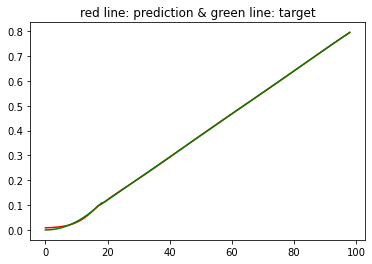

In [11]:
plt.plot(X,Y,color="red")
plt.plot(X,target,color="green")
plt.title("red line: prediction & green line: target")
plt.show()